Učitavanje podataka i ispis osnovnih podataka
Postoji 38 stupaca različitih varijabli (float64(6), int64(7), object(25)), te postoji 1709 redova.

In [76]:
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('processed_data2.csv')

print(data.head())
print(data.info())
print(data.describe())
print(data.count())

  phone_brand              phone_model      store  price_usd  storage  ram  \
0       apple      Apple iPhone 16 Pro  Amazon DE    1357.55      256    8   
1       apple      Apple iPhone 16 Pro  Amazon DE    1492.55      512    8   
2       apple      Apple iPhone 16 Pro  Amazon DE    1705.32     1000    8   
3       apple  Apple iPhone 16 Pro Max  Amazon DE    1564.92      512    8   
4       apple     Apple iPhone 12 mini  Amazon DE     247.32      128    4   

  launch_date                                     dimensions  weight  \
0  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
1  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
2  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
3  2024-09-20    163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in)   227.0   
4  2020-11-13  131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in)   135.0   

                                        display_type  ...   price_range  \
0  LTPO Super Retina XD

Provjera postoje li null vrijednosti i duplikati

Broj null vrijednosti
gpu_company           71

Prije misanja duplikata  imali smo ovoliko podataka
gpu_company           1637
fingerprint           1708
video_resolution      1708

, a sada nakon brisanja duplikata imamo ovoliko podataka 

gpu_company           1628
fingerprint           1628
video_resolution      1628


Za daljnju analizu uzeti ćemo ram (int64) , price_usd (float) i weight (float)

In [ ]:

print(data.isnull().sum())

data=data.dropna()
data=data.drop_duplicates(keep='first')
print(data.count())

phone_brand           0
phone_model           0
store                 0
price_usd             0
storage               0
ram                   0
launch_date           0
dimensions            0
weight                0
display_type          0
display_size          0
display_resolution    0
os                    0
nfc                   0
usb                   0
battery               0
features_sensors      0
colors                0
video                 0
chipset               0
cpu                   0
gpu                   0
year                  0
foldable              0
ppi_density           0
quantile_10           0
quantile_50           0
quantile_90           0
price_range           0
os_type               0
os_version            0
battery_size          0
colors_available      0
chip_company          0
cpu_core              0
gpu_company           0
fingerprint           0
video_resolution      0
dtype: int64
phone_brand           1628
phone_model           1628
store                

Ram
Skewness: 0.7425264095936752 Pozitivna asimetrija, distribucija je blago nagnuta u lijevo.
Kurtosis: 0.3458407155881904 Distribucia je više šiljasta od normale.
count    1708.000000
mean        7.981265
std         3.425618
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        24.000000

Price usd
Skewness: 1.810037266508322  pozitivna asimetrija, distribucija je nagnuta u lijevo
Kurtosis: 3.722303896201711  distribuciija je jako šiljasta
count    1708.000000
mean      419.983156
std       361.680703
min        52.630000
25%       167.562500
50%       278.835000
75%       550.327500
max      2353.820000

Weight
Skewness: 5.254826283513168 jaka pozitivna asimetrija, distribucija je nagnuta u lijevo
Kurtosis: 75.06441187819306  distribuciija je ekstremno šiljasta
count    1708.000000
mean      195.203769
std        24.738661
min       135.000000
25%       183.500000
50%       193.500000
75%       204.000000
max       627.000000

In [85]:
from scipy.stats import skew, kurtosis
print('ram')
skewness = skew(data['ram'])
kurt = kurtosis(data['ram'])
print('Skewness:', skewness)
print('Kurtosis:', kurt)
print(data['ram'].describe())

print('price usd')
skewness = skew(data['price_usd'])
kurt = kurtosis(data['price_usd'])
print('Skewness:', skewness)
print('Kurtosis:', kurt)
print(data['price_usd'].describe())

print('weight')
skewness = skew(data['weight'])
kurt = kurtosis(data['weight'])
print('Skewness:', skewness)
print('Kurtosis:', kurt)
print(data['weight'].describe())



ram
Skewness: 0.7163559761850175
Kurtosis: 0.3020185522604306
count    1708.000000
mean        7.981265
std         3.425618
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        24.000000
Name: ram, dtype: float64
price usd
Skewness: 1.810037266508322
Kurtosis: 3.722303896201711
count    1708.000000
mean      419.983156
std       361.680703
min        52.630000
25%       167.562500
50%       278.835000
75%       550.327500
max      2353.820000
Name: price_usd, dtype: float64
weight
Skewness: 5.254826283513168
Kurtosis: 75.06441187819306
count    1708.000000
mean      195.203769
std        24.738661
min       135.000000
25%       183.500000
50%       193.500000
75%       204.000000
max       627.000000
Name: weight, dtype: float64


Grafička analiza

za boxplot price_usd postoji puno outliera koji prelaze max vrijednsot, za weight imamo manje outliera, ali postoje outlieri koji su manji i veci od maksimalne i minimalne vrjednosti, za ram postoji jedan outlier koji je veci od maksimuma

za histogram weight vidimo da je većina vrijednsoti oko 200 grama, a imamo par vrijednosti koje imaju 400, 500 ili preko 600 grama, za varijeblu price-usd vidimo da je većina podataka ispod vrijednosti 500, a imamo vrijednosti i do 2200m, za varijeblu ram vidimo da postoje određene vrijednosti, vecina podataka je ispod 10 gb rama, postoji outlier sa 24gb ram-a




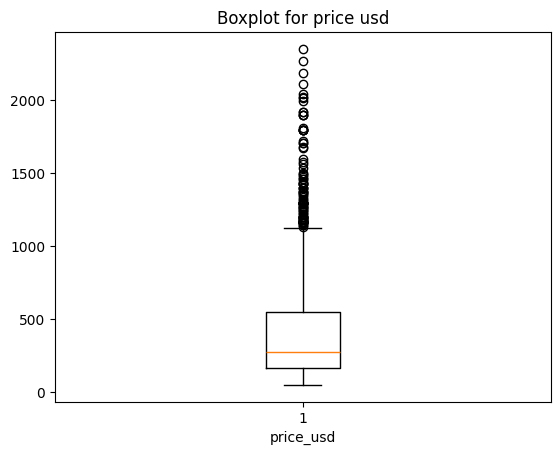

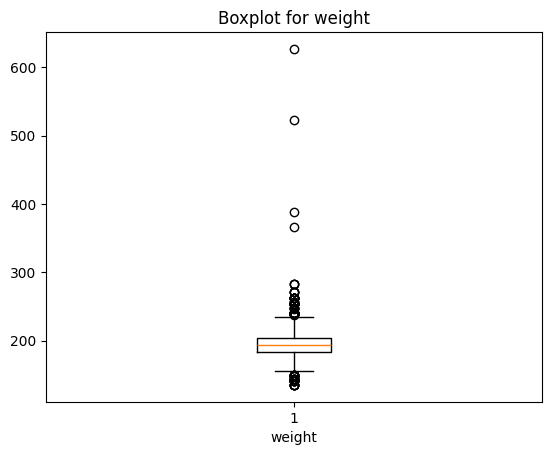

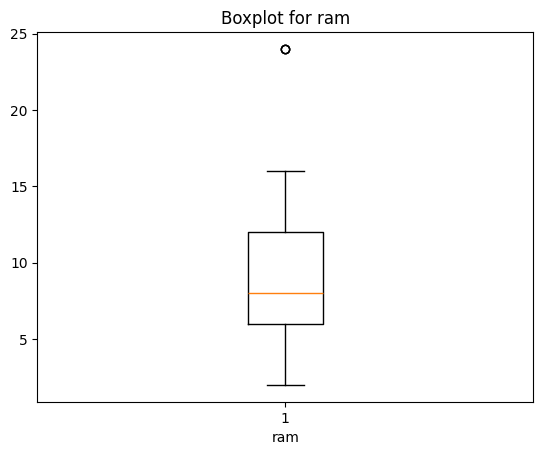

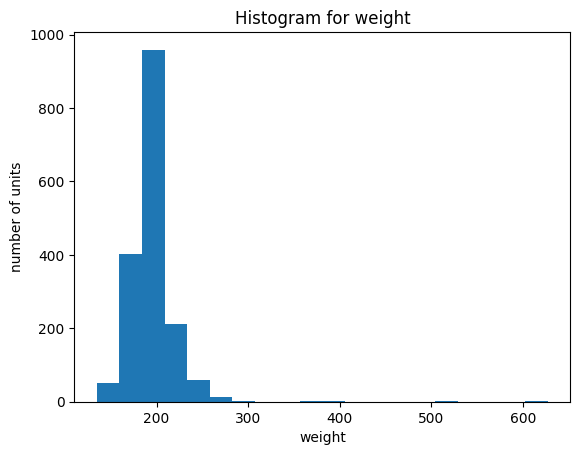

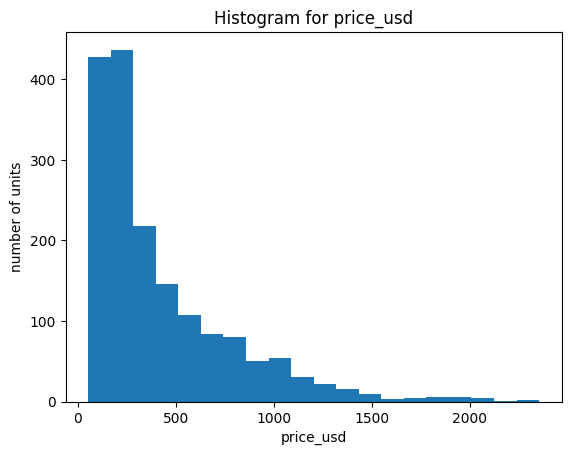

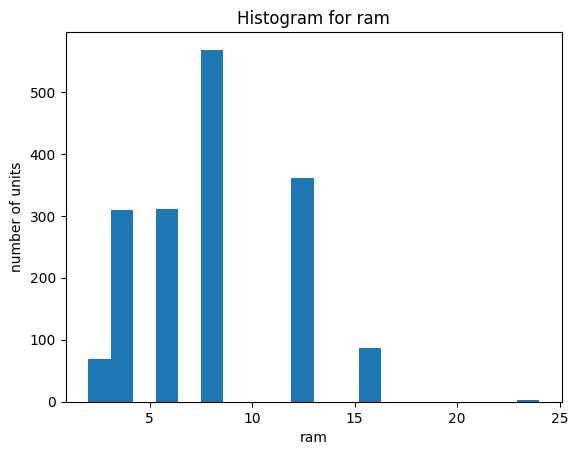

In [83]:
plt.boxplot(data['price_usd'])
plt.title('Boxplot for price usd')
plt.xlabel('price_usd')
plt.show()

plt.boxplot(data['weight'])
plt.title('Boxplot for weight')
plt.xlabel('weight')
plt.show()

plt.boxplot(data['ram'])
plt.title('Boxplot for ram')
plt.xlabel('ram')
plt.show()

plt.hist(data['weight'],bins=20)
plt.title('Histogram for weight')
plt.xlabel('weight')
plt.ylabel('number of units')
plt.show()


plt.hist(data['price_usd'],bins=20)
plt.title('Histogram for price_usd')
plt.xlabel('price_usd')
plt.ylabel('number of units')
plt.show()

plt.hist(data['ram'],bins=20)
plt.title('Histogram for ram')
plt.xlabel('ram')
plt.ylabel('number of units')
plt.show()


Iz dobivenih podataka vidimo da varijabla price-usd ima previše outliera da bi ga mogli koristiti za neku dobru daljnju analizu bez da dodatno obradimo podatke, varijabla weight ima manje outliera , ali ima veliki Skewness: 5.254826283513168 i Kurtosis: 75.06441187819306 , od odabranih varijabli ram je najbolji jer ima jedan outlier i ima mali Skewness: 0.7425264095936752 i Kurtosis: 0.3458407155881904 pa je pogodan za daljnje korištenje.